In [1]:
%cd ..
%cd ..

/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/notebooks
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs


/home/flandgraf/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Mixing in the GMF of the Milky Way (UF23 Model)

Similar to the previous tutorial, this tutorial demonstrates the mixing in the Galactic magnetic field (GMF) of the Milky Way. Here we use the <a href="https://ui.adsabs.harvard.edu/abs/2024ApJ...970...95U/abstract">Unger & Farrar (2024)</a> model to model the GMF and we will show how to use all 8 variations of the UF23 model simultaneously

We start with the usual imports:

In [2]:
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt

fatal: No names found, cannot describe anything.


Next we initialize the model with the same parameters as the previous tutorial. However, instead of creating one instance of the `ModuleList`, we create a list with 8 `ModuleList`s, one for each model:

In [3]:
EGeV = np.logspace(-1., 3., 101)  # the energy range, roughly matching the Fermi-LAT energy range
src = Source(z=0.02, l=152., b=-12.)  # some dummy source for initialization
pa_in = np.diag([0., 0., 1.])  # the inital polarization matrix; a pure ALP state

ml = [ModuleList(ALP(m=1., g=1.), src, pin=pa_in, EGeV=EGeV, seed=0) for i in range(8)]

models = ['base', 'expX', 'neCL', 'twistX', 'nebCor', 'cre10', 'synCG', 'spur']
for i in range(8):
    ml[i].add_propagation("GMF", 0, model='UF23', UF23_model=models[i])

environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi


### Computing conversion probability

Now we compute the conversion probability as a function of energy and along the line of sight as a function of distance. Therefore we need to prepare the numpy arrays to store the results for all 8 models:

In [4]:
px, py, pa = np.zeros((3, 8, EGeV.size))
prx, pry, pra = np.zeros((3, 8, 99, EGeV.size))

Then we provide the initial polarization states as in the previous tutorial and compute the conversion probability for all 8 models using a for-loop:

In [5]:
px_in = np.diag([1., 0., 0.])
py_in = np.diag([0., 1., 0.])

for i in range(8):
    px[i], py[i], pa[i] = ml[i].run() # at first we need to calculate conversion probability as a function of energy
    prx[i] = (ml[i].modules["GMF"].show_conv_prob_vs_r(pa_in, px_in))
    pry[i] = (ml[i].modules["GMF"].show_conv_prob_vs_r(pa_in, py_in))
    pra[i] = (ml[i].modules["GMF"].show_conv_prob_vs_r(pa_in, pa_in))

   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:799: UserWarning: Not all values of linear polarization are real values!
  warnings.warn("Not all values of linear polarization are real values!")
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:802: UserWarning: Not all values of circular polarization are real values!
  warnings.warn("Not all values of circular polarization are real values!")
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:799: UserWarning: Not all values of linear polarization are real values!
  warnings.warn("Not all values of linear polarization are real values!")
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/gammaALPs/base/transfer.py:802: UserWarning: Not all values of circular polarization are real va

Now we can again plot the conversion probability for one fixed energy as a function of propagation distance together with the transversal magnetic field strength. This time for 8 models:

Energy: 3.981071705534973 GeV


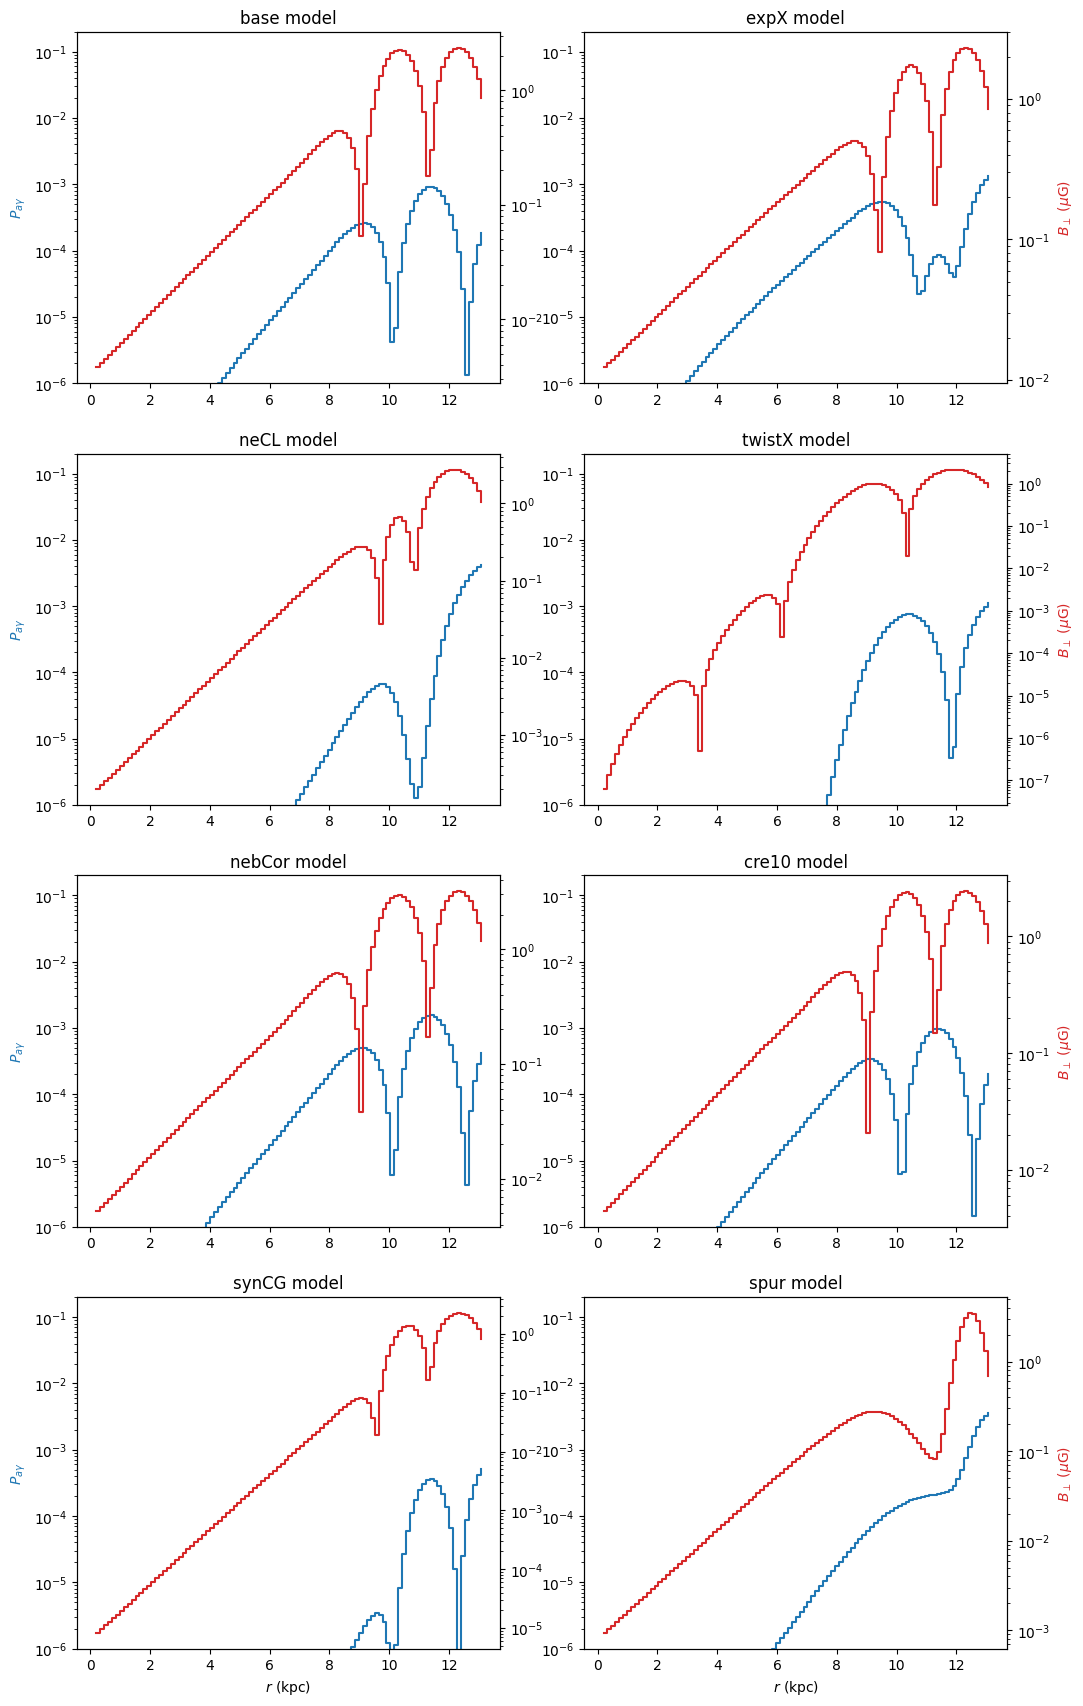

In [10]:
E = 4
idx = np.absolute(EGeV-E).argmin()
print ("Energy:", EGeV[idx], "GeV")

fig, axs = plt.subplots(4,2, figsize=(12, 21))

for i, ax in enumerate(axs.flat):
    ax.set_title(f"{models[i]} model")
    ax.semilogy(ml[i].modules["GMF"].r, (prx[i][:,idx] + pry[i][:,idx])[::-1],
                drawstyle='steps')
    
    ax.set_ylabel(r"$P_{a \gamma}$", color = plt.cm.tab10(0.))
    ax.set_xlabel("$r$ (kpc)")
    ax.set_ylim(1e-6,2e-1)
    
    ax2 = ax.twinx()
    ax2.semilogy(ml[i].modules["GMF"].r, ml[i].modules["GMF"].B[::-1],
                 color = plt.cm.tab10(0.3),
                 drawstyle ='steps')
    
    ax2.set_ylabel(r"$B_{\perp}$ ($\mu$G)", color = plt.cm.tab10(0.3))
    ax.label_outer()
    ax2.label_outer()
    ax.tick_params(axis="both", which="both", labelbottom = True, labelleft = True)
    ax2.tick_params(axis="both", which="both", labelbottom = True, labelright = True)

plt.show()

In the same way we can plot the total conversion probability as a function of energy:

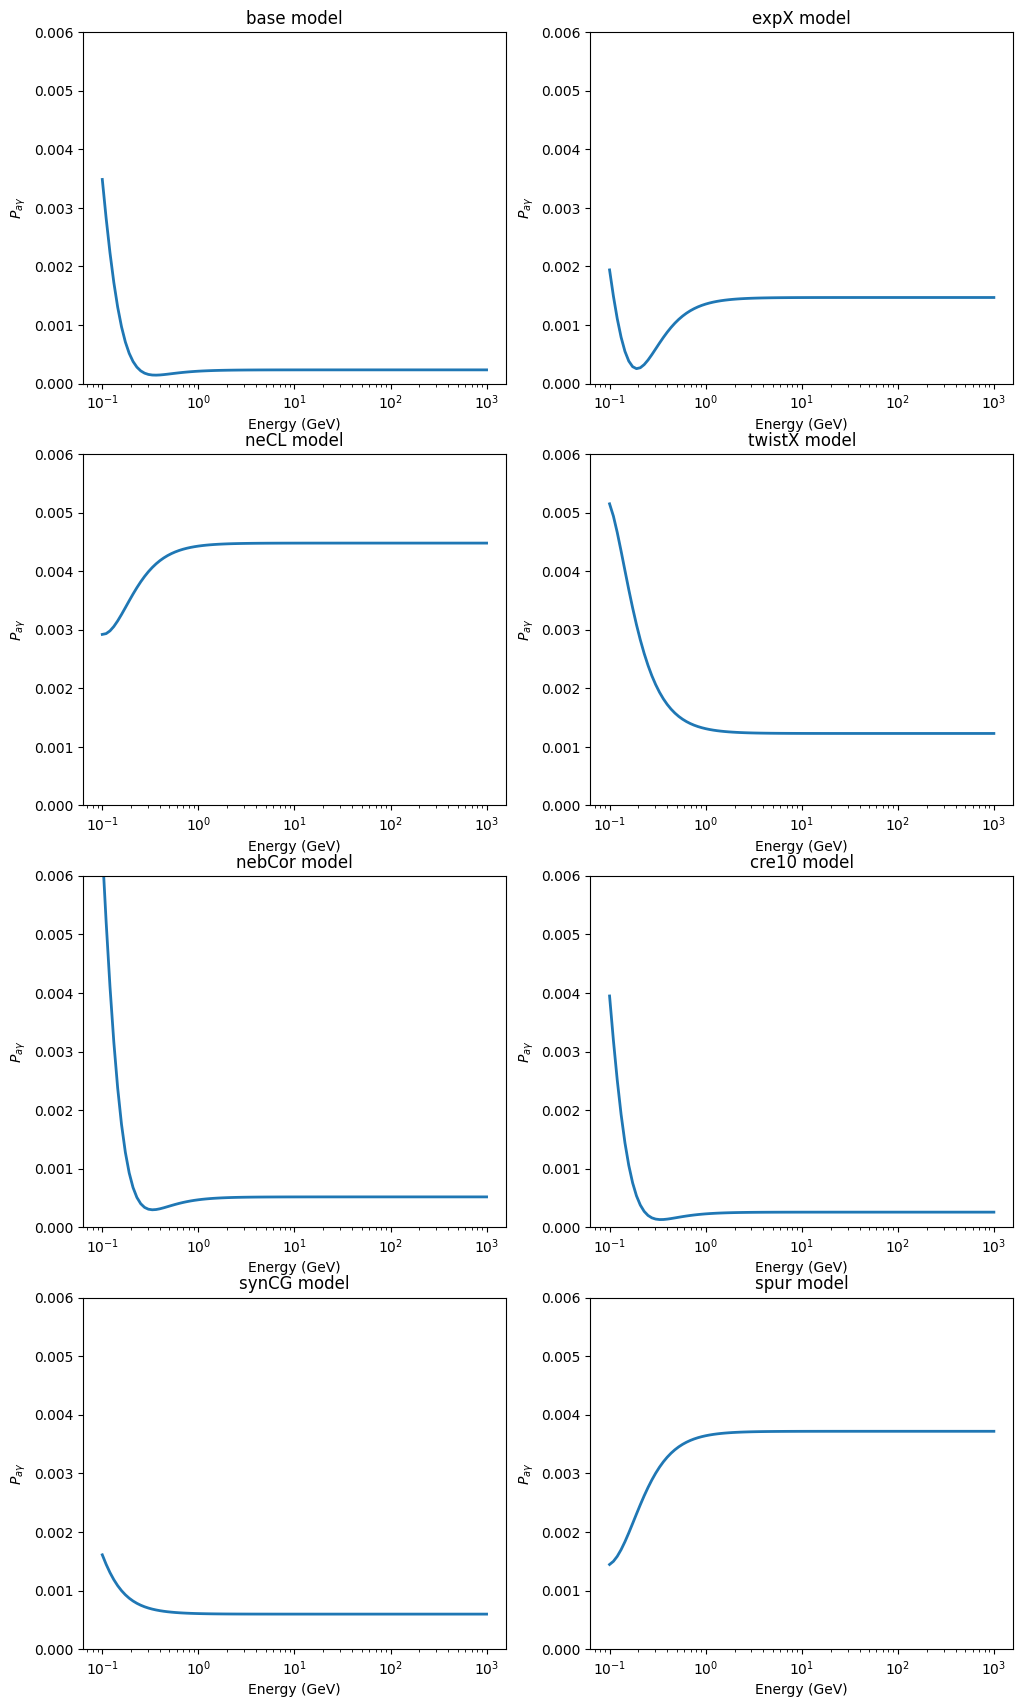

In [11]:
fig, axs = plt.subplots(4,2, figsize=(12, 21))

for i, ax in enumerate(axs.flat):
    ax.set_title(f"{models[i]} model")
    ax.semilogx(EGeV, px[i] + py[i], lw = 2)

    ax.set_ylim(0, 0.006)
    ax.set_ylabel(r"$P_{a\gamma}$")
    ax.set_xlabel("Energy (GeV)")

plt.show()

### Sky map for mixing in the GMF

Exactly like shown in the previous tutorial, we can use the UF23 model to create skymaps using the `healpy` package.

Instead of the 'jannson12' model one can use `model='UF23'`when using `add_propagation`. That would by default use the "base" model. We can change that by adding the paramater `UF23_model=model` as shown above.

To create skymaps with good resolution it is easier to create them for each model separately, as shown in the previous tutorial.